# PCR via Classification

This has just been copied from experimental. Needs cleaning and whatever - K

## PCA

In [8]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.metrics import balanced_accuracy_score




X_df = pd.read_csv("x_classification.csv")
y_df = pd.read_csv("y_classification.csv")
X_df.drop(columns='Unnamed: 0', inplace=True)
y_df.drop(columns='Unnamed: 0', inplace=True)

X_df.head()

,Age,original_shape_Elongation,original_shape_LeastAxisLength,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,original_shape_MinorAxisLength,original_shape_Sphericity,original_shape_SurfaceVolumeRatio,original_firstorder_90Percentile,original_firstorder_InterquartileRange,...,original_glszm_ZoneEntropy,original_ngtdm_Busyness,original_ngtdm_Contrast,original_ngtdm_Strength,HER2_0.0,Gene_0.0,Gene_1.0,HER2_1.0,ER_0,ER_1
0,-1.892963,-0.437862,-0.140682,-0.166632,-0.192642,-0.547613,0.061209,-0.285288,-0.870356,-1.726582,...,-0.316631,-0.433979,-0.695066,-0.243780,True,False,True,False,True,False
1,-1.530378,0.333764,0.397379,0.039864,0.826795,0.679372,-0.736942,-0.432346,-0.571973,-1.173215,...,-0.156962,-0.378871,-0.741743,-0.272476,True,False,True,False,True,False
2,0.826421,0.887163,-0.271987,-0.619094,-0.652343,-0.549531,0.945161,-0.686096,-1.060332,-1.059595,...,0.112266,-0.409735,-0.621590,-0.256153,True,False,True,False,False,True
3,-0.261333,1.422510,0.264026,-0.354359,-0.381809,-0.140360,0.247458,-0.653768,-0.302221,-0.371422,...,-0.084224,-0.146667,-0.397827,-0.306838,True,False,True,False,True,False
4,-0.986501,1.441590,-0.001525,-0.522597,-0.569057,-0.358092,-0.000672,-0.168040,-0.584934,-0.607474,...,0.497299,-0.165294,-0.196964,-0.303642,True,False,True,False,True,False


In [9]:
y_df.head()

,pCR (outcome)
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


## experimented with differnent values for PCA, PCA does not increase accuracy 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

continous_data = X_df.drop(columns=['HER2_0.0','Gene_0.0','Gene_1.0','HER2_1.0','ER_0','ER_1'])
discrete_data = X_df[['HER2_0.0','Gene_0.0','Gene_1.0','HER2_1.0','ER_0','ER_1']]


#different PCA values have been experimented and this was found to be the optimal one whilst still reducing the features 
# Initialize PCA to keep 95% of the variance
pca = PCA(n_components=0.975)  

# Fit and transform the training data
transfromed_continous_data = pca.fit_transform(continous_data)

x = pd.concat([discrete_data.reset_index(drop=True), continous_data.reset_index(drop=True)], axis=1)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(x, y_df, test_size=0.2, random_state=42)


'ER_0', 'ER_1', 'PgR_0.0', 'PgR_1.0', 'HER2_1.0', 'ChemoGrade_2.0', 'Proliferation_1.0', 'Proliferation_3.0', 'LNStatus_0.0', 'LNStatus_1.0'
#'ER_0','ER_1','PgR_0.0','PgR_1.0','HER2_0.0','HER2_1.0','ChemoGrade_2.0','Proliferation_1.0','Proliferation_3.0','LNStatus_0.0','LNStatus_1.0','Gene_0.0','Gene_1.0'

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:", cumulative_variance)
print("Number of components:", pca.n_components_)



Cumulative explained variance: [0.26280938 0.47192187 0.58150672 0.68219573 0.74371406 0.79289417
 0.83401786 0.86393035 0.88579288 0.90284564 0.91653041 0.92932518
 0.94067336 0.94978394 0.95696851 0.9634644  0.96902543 0.97431674
 0.97864876]
Number of components: 19


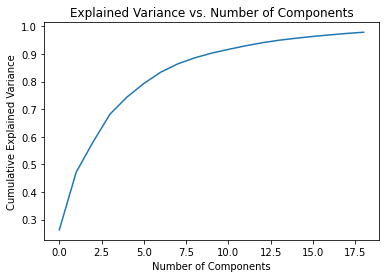

In [11]:
import matplotlib.pyplot as plt

plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()


# Model Development without PCA


/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

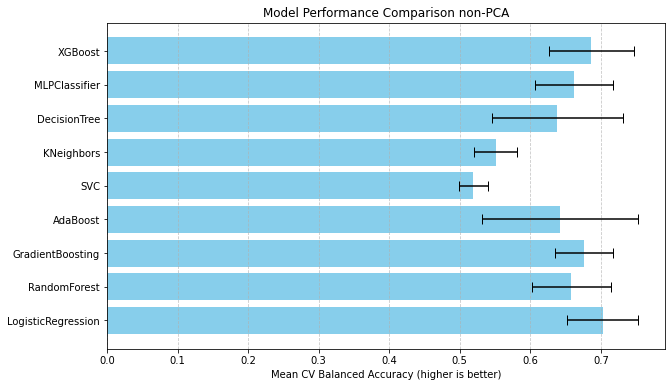

Best Model: LogisticRegression
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93        65
         1.0       0.75      0.46      0.57        13

    accuracy                           0.88        78
   macro avg       0.82      0.72      0.75        78
weighted avg       0.88      0.88      0.87        78

0.7153846153846154


/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.base import TransformerMixin


# Define different classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    'SVC': SVC(kernel='rbf', probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}


# Define a custom scoring metric (Accuracy in this case)
accuracy_scorer = make_scorer(balanced_accuracy_score)# Create pipelines for each classifier


results = {}

for classifier in classifiers.keys():
    # print(f"Running Cross-Validation for {classifier}...")
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(classifiers[classifier], X_train, y_train, cv=5, scoring=accuracy_scorer, n_jobs=-1)
    
    # Store results
    results[classifier] = {
        'cv_scores': cv_scores,
        'cv_mean_accuracy': cv_scores.mean(),
        'cv_std_accuracy': cv_scores.std()
    }
    
    # print(f"Model: {classifier}")
    # print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    # print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
    # print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")
    # print()

# Visualize results
model_names = list(results.keys())
cv_mean_accuracy = [results[name]['cv_mean_accuracy'] for name in model_names]
cv_std_accuracy = [results[name]['cv_std_accuracy'] for name in model_names]

# Bar plot for cross-validation results
plt.figure(figsize=(10, 6))
plt.barh(model_names, cv_mean_accuracy, xerr=cv_std_accuracy, color='skyblue', capsize=5)
plt.xlabel('Mean CV Balanced Accuracy (higher is better)')
plt.title('Model Performance Comparison non-PCA')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Fit and evaluate the best model (based on mean accuracy) on the validation set
best_model_name = max(results, key=lambda name: results[name]['cv_mean_accuracy'])
best_pipeline = classifiers[best_model_name]
best_pipeline.fit(X_train, y_train)

# Predict on the validation set
y_pred = best_pipeline.predict(X_test)


# Print classification report
print(f"Best Model: {best_model_name}")
print(classification_report(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))


# Model Development with PCA

/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

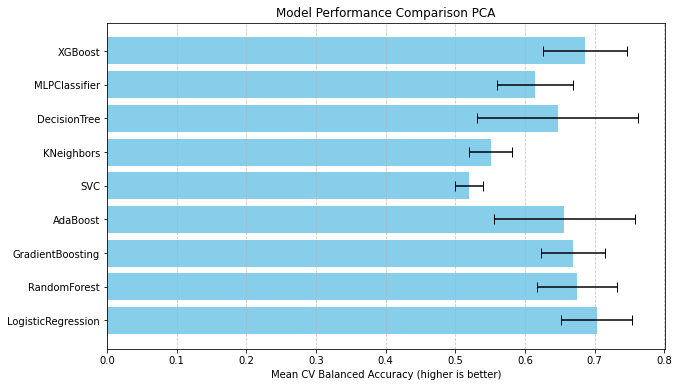

LogisticRegression 0.7153846153846154


/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# Define different classifiers
classifiers = {
    'LogisticRegression': LogisticRegression(max_iter=500, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    'SVC': SVC(kernel='rbf', probability=True, random_state=42),
    'KNeighbors': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=500, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
}


# Define a custom scoring metric (Accuracy in this case)
accuracy_scorer = make_scorer(balanced_accuracy_score)# Create pipelines for each classifier


results = {}

for classifier in classifiers.keys():
    #print(f"Running Cross-Validation for {classifier}...")
    
    # Perform 5-fold cross-validation
    cv_scores = cross_val_score(classifiers[classifier], X_train_pca, y_train_pca, cv=5, scoring=accuracy_scorer, n_jobs=-1)
    
    # Store results
    results[classifier] = {
        'cv_scores': cv_scores,
        'cv_mean_accuracy': cv_scores.mean(),
        'cv_std_accuracy': cv_scores.std()
    }
    
    # print(f"Model: {classifier}")
    # print(f"Cross-Validation Accuracy Scores: {cv_scores}")
    # print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
    # print(f"Standard Deviation of CV Accuracy: {cv_scores.std():.4f}")
    # print()

# Visualize results
model_names = list(results.keys())
cv_mean_accuracy = [results[name]['cv_mean_accuracy'] for name in model_names]
cv_std_accuracy = [results[name]['cv_std_accuracy'] for name in model_names]

# Bar plot for cross-validation results
plt.figure(figsize=(10, 6))
plt.barh(model_names, cv_mean_accuracy, xerr=cv_std_accuracy, color='skyblue', capsize=5)
plt.xlabel('Mean CV Balanced Accuracy (higher is better)')
plt.title('Model Performance Comparison PCA')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Fit and evaluate the best model (based on mean accuracy) on the validation set
best_model_name = max(results, key=lambda name: results[name]['cv_mean_accuracy'])
best_pipeline = classifiers[best_model_name]
best_pipeline.fit(X_train_pca, y_train_pca)
y_pred = best_pipeline.predict(X_test_pca)
print(best_model_name, balanced_accuracy_score(y_test_pca, y_pred))



## need to re do below graph with new data

In [14]:
# from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, classification_report

# # Initialize a dictionary to store ROC data
# roc_data = {}

# # Loop through models and evaluate ROC AUC
# plt.figure(figsize=(10, 8))
# for classifier in classifiers.keys():
#     # Fit the pipeline
#     classifiers[classifier].fit(X_train, y_train)
    
#     # Get predicted probabilities or decision scores
#     if hasattr(classifiers[classifier], "predict_proba"):
#         y_scores = classifiers[classifier].predict_proba(X_test)[:, 1]
#     else:  # For classifiers like SVM, use decision_function
#         y_scores = classifiers[classifier].decision_function(X_test)
    
#     # Compute ROC curve and AUC
#     fpr, tpr, thresholds = roc_curve(y_test, y_scores)
#     roc_auc = auc(fpr, tpr)
#     roc_data[classifier] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}
    
#     # Plot the ROC curve
#     plt.plot(fpr, tpr, label=f"{classifier} (AUC = {roc_auc:.2f})")

# # Plot diagonal line for random guess
# plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')

# # Add labels, title, and legend
# plt.title('ROC Curves for Classifiers', fontsize=16)
# plt.xlabel('False Positive Rate', fontsize=12)
# plt.ylabel('True Positive Rate', fontsize=12)
# plt.legend(loc='lower right')
# plt.grid()
# plt.show()

# # Print classification reports for all models
# for classifier in classifiers.keys():
#     y_pred = classifiers[classifier].predict(X_train)
#     print(f"Classification Report for {classifier}:\n")
#     print(classification_report(y_test, y_pred))
#     print("-" * 60)

## performance tracker 

In [15]:
perfomance_tracker = {}

## optimising xgboost 

In [16]:



params = {
    'n_estimators' :  np.arange(80,120,10), # how many tree make up the estimator
    'booster' : ['gblinear', 'gbtree'], # different evaulation methods (linear or tree)
    'max_depth' : np.arange(2,10, 2),
    'learning_rate' : [0.05, 0.1, 0.15],
          }
#without PCA
#Best Parameters: {'booster': 'gblinear', 'learning_rate': 0.1, 'n_estimators': 90} with best scores 0.7914115646258504
#prediction accurracy 

#with PCA
#Best Parameters: {'booster': 'gblinear', 'learning_rate': 0.1, 'n_estimators': 90} with best scores 0.7914115646258504
#prediction acurracy : 0.7230769230769231

grid_search_gxboost = GridSearchCV(xgb.XGBClassifier(), param_grid=params, scoring='balanced_accuracy', cv=5)
grid_search_gxboost.fit(X_train, y_train)



/home/michael/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:03:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/michael/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:03:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/michael/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:03:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/michael/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:03:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/michael/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:03:22] WARNING: /workspace/src/learner.cc:740: 
Paramete

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gblinear', 'gbtree'],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([ 80,  90, 100, 110])},
             scoring='balanced_accuracy')

In [17]:
grid_search_gxboost_pca = GridSearchCV(xgb.XGBClassifier(), param_grid=params, scoring='balanced_accuracy', cv=5)
grid_search_gxboost_pca.fit(X_train_pca, y_train_pca)

/home/michael/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:04:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/michael/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:04:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/michael/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:04:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/michael/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:04:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth" } are not used.

  warnings.warn(smsg, UserWarning)
/home/michael/.local/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [13:04:45] WARNING: /workspace/src/learner.cc:740: 
Paramete

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'booster': ['gblinear', 'gbtree'],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([ 80,  90, 100, 110])},
             scoring='balanced_accuracy')

In [18]:
best_params = grid_search_gxboost.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_gxboost.best_score_}')

y_pred = grid_search_gxboost.predict(X_test)
perfomance_tracker['grid_search_gxboost'] = balanced_accuracy_score(y_test, y_pred)
print(perfomance_tracker['grid_search_gxboost'])

Best Parameters: {'booster': 'gblinear', 'learning_rate': 0.15, 'max_depth': 8, 'n_estimators': 90} with best scores 0.721938775510204
0.7153846153846154


In [19]:
best_params = grid_search_gxboost_pca.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_gxboost_pca.best_score_}')

y_pred = grid_search_gxboost_pca.predict(X_test_pca)
perfomance_tracker['grid_search_gxboost_pca_score'] = balanced_accuracy_score(y_test_pca, y_pred)
print(perfomance_tracker['grid_search_gxboost_pca_score'])

Best Parameters: {'booster': 'gblinear', 'learning_rate': 0.15, 'max_depth': 2, 'n_estimators': 90} with best scores 0.7198554421768708
0.7153846153846154


## Optimisig Logisitic Regression

In [20]:
params = {
    'solver' : [ 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    'penalty' : ['l1', 'l2', 'elasticnet', None]
}

#without pca
#Best Parameters: {'penalty': 'l2', 'solver': 'liblinear'} with best scores 0.769047619047619
#prediction accuracy: 0.7076923076923077

#with pca
#Best Parameters: {'penalty': 'l2', 'solver': 'liblinear'} with best scores 0.769047619047619
#prediction accuracy: 0.7076923076923077

grid_search_logReg = GridSearchCV(LogisticRegression(), param_grid=params, scoring='balanced_accuracy', cv=5)
grid_search_logReg.fit(X_train, y_train)


/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='balanced_accuracy')

In [21]:
grid_search_logReg_pca = GridSearchCV(LogisticRegression(), param_grid=params, scoring='balanced_accuracy', cv=5)
grid_search_logReg_pca.fit(X_train_pca, y_train_pca)

/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='balanced_accuracy')

In [22]:
best_params = grid_search_logReg.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_logReg.best_score_}')

y_pred = grid_search_logReg.predict(X_test)
perfomance_tracker['grid_search_logReg'] = balanced_accuracy_score(y_test, y_pred)
print(perfomance_tracker['grid_search_logReg'])

Best Parameters: {'penalty': 'l1', 'solver': 'saga'} with best scores 0.7302295918367345
0.6923076923076923


In [23]:
best_params = grid_search_logReg_pca.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_logReg_pca.best_score_}')

y_pred = grid_search_logReg_pca.predict(X_test_pca)
perfomance_tracker['grid_search_logReg_pca'] = balanced_accuracy_score(y_test_pca, y_pred)
print(perfomance_tracker['grid_search_logReg_pca'])

Best Parameters: {'penalty': 'l1', 'solver': 'saga'} with best scores 0.7302295918367345
0.6923076923076923


## Optimising Decision tree

In [24]:
params = {
    #compare both split evaluation functions
    'criterion' : ['gini', 'entropy'], 
    
    #after some research it's was found a tree in this depth range is approate for a database of this size 
    'max_depth' : [2, 3, 4, 5, 6], 
    
    #this describes what % of each class should be at each leaf node, a higher value here can be used to limit overfitting
    'min_weight_fraction_leaf' : [0.0, 0.1, 0.2, 0.3], 
    
    #this decides if a split is allowed based on how many samples are at that node
    'min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10]
}
#without PCA
#Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.2} with best scores 0.7105442176870749
#With prediction accuracy : 0.7

#with PCA 
#Best Parameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.2} with best scores 0.7105442176870749
#with prediction accuracy : 0.7

grid_search_DT = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    scoring='balanced_accuracy',
    cv=5
    )

grid_search_DT.fit(X_train,y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3]},
             scoring='balanced_accuracy')

In [25]:
grid_search_DT_pca = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    scoring='balanced_accuracy',
    cv=5
    )

grid_search_DT_pca.fit(X_train_pca,y_train_pca)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3]},
             scoring='balanced_accuracy')

In [26]:
best_params = grid_search_DT.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_DT.best_score_}')

y_pred = grid_search_DT.predict(X_test)
perfomance_tracker['grid_search_DT'] = balanced_accuracy_score(y_test, y_pred)
print(perfomance_tracker['grid_search_DT'])

Best Parameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0} with best scores 0.7227465986394558
0.6


In [27]:
best_params = grid_search_DT_pca.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_DT_pca.best_score_}')

y_pred = grid_search_DT_pca.predict(X_test_pca)
perfomance_tracker['grid_search_DT_pca'] = balanced_accuracy_score(y_test_pca, y_pred)
print(perfomance_tracker['grid_search_DT_pca'])

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0} with best scores 0.7113520408163264
0.6


## optimising gradient boost 

In [28]:
params = {
    'n_estimators' :  np.arange(80,120,10), # how many tree make up the estimator
    'max_depth' : np.arange(2,10, 2),
    'learning_rate' : [0.05, 0.1, 0.15],
          }

grid_search_GB = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=5, n_jobs=-1, scoring='balanced_accuracy')
grid_search_GB.fit(X_train, y_train)

/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([ 80,  90, 100, 110])},
             scoring='balanced_accuracy')

In [29]:
grid_search_GB_pca = GridSearchCV(GradientBoostingClassifier(), param_grid=params, cv=5, n_jobs=-1, scoring='balanced_accuracy')
grid_search_GB_pca.fit(X_train_pca, y_train_pca)


/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': array([2, 4, 6, 8]),
                         'n_estimators': array([ 80,  90, 100, 110])},
             scoring='balanced_accuracy')

In [30]:
best_params = grid_search_GB.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_GB.best_score_}')

y_pred = grid_search_GB.predict(X_test)
perfomance_tracker['grid_search_GB'] = balanced_accuracy_score(y_test, y_pred)
print(perfomance_tracker['grid_search_GB'])

Best Parameters: {'learning_rate': 0.15, 'max_depth': 6, 'n_estimators': 110} with best scores 0.7177721088435374
0.7


In [31]:
best_params = grid_search_GB_pca.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_GB_pca.best_score_}')

y_pred = grid_search_GB_pca.predict(X_test_pca)
perfomance_tracker['grid_search_GB_pca'] = balanced_accuracy_score(y_test_pca, y_pred)
print(perfomance_tracker['grid_search_GB_pca'])

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 90} with best scores 0.7125425170068027
0.7384615384615385


## optimising MLP

In [32]:
#Without PCA
#Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'solver': 'adam'} with best scores 0.7638605442176869
#with prediction accurcy :  0.676923076923077

#with pca 
#Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,), 'solver': 'adam'} with best scores 0.7424744897959183
#with prediction accurcy : 0.6846153846153846
param_grid = {
    'hidden_layer_sizes':[(32,), (64,), (64, 32), (128, 64, 32), (50,), (100,), (100, 50), (100, 50, 25)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

grid_search_MLP = GridSearchCV(MLPClassifier(max_iter=150), param_grid=param_grid, cv=5, n_jobs=-1, scoring='balanced_accuracy')

grid_search_MLP.fit(X_train, y_train)


/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversio

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=150), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(32,), (64,), (64, 32),
                                                (128, 64, 32), (50,), (100,),
                                                (100, 50), (100, 50, 25)],
                         'solver': ['adam', 'sgd']},
             scoring='balanced_accuracy')

In [33]:
grid_search_MLP_pca = GridSearchCV(MLPClassifier(max_iter=150), param_grid=param_grid, cv=5, n_jobs=-1, scoring='balanced_accuracy')

grid_search_MLP_pca.fit(X_train_pca, y_train_pca)

/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/michael/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversio

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=150), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(32,), (64,), (64, 32),
                                                (128, 64, 32), (50,), (100,),
                                                (100, 50), (100, 50, 25)],
                         'solver': ['adam', 'sgd']},
             scoring='balanced_accuracy')

In [34]:
best_params = grid_search_MLP.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_MLP.best_score_}')

y_pred = grid_search_MLP.predict(X_test)
perfomance_tracker['grid_search_MLP'] = balanced_accuracy_score(y_test, y_pred)
print(perfomance_tracker['grid_search_MLP'])

Best Parameters: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32), 'solver': 'adam'} with best scores 0.7065476190476191
0.6923076923076923


In [35]:
best_params = grid_search_MLP_pca.best_params_
print(f'Best Parameters: {best_params} with best scores {grid_search_MLP_pca.best_score_}')

y_pred = grid_search_MLP_pca.predict(X_test_pca)
perfomance_tracker['grid_search_MLP_pca'] = balanced_accuracy_score(y_test_pca, y_pred)
print(perfomance_tracker['grid_search_MLP_pca'])

Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (64,), 'solver': 'adam'} with best scores 0.7147959183673469
0.7769230769230769


{'grid_search_gxboost': 0.7153846153846154, 'grid_search_gxboost_pca_score': 0.7153846153846154, 'grid_search_logReg': 0.6923076923076923, 'grid_search_logReg_pca': 0.6923076923076923, 'grid_search_DT': 0.6, 'grid_search_DT_pca': 0.6, 'grid_search_GB': 0.7, 'grid_search_GB_pca': 0.7384615384615385, 'grid_search_MLP': 0.6923076923076923, 'grid_search_MLP_pca': 0.7769230769230769}


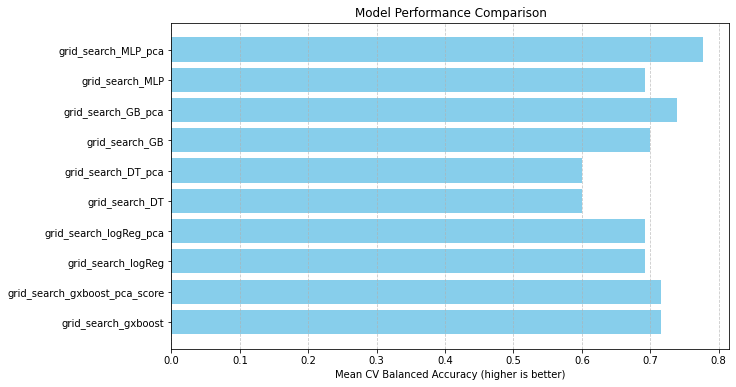

In [36]:
# plt.hist(perfomance_tracker.values(), perfomance_tracker.keys())
# plt.ylabel('Balanced Accuracy score')
# plt.xlabel('Models')
print(perfomance_tracker)

plt.figure(figsize=(10, 6))
plt.barh(list(perfomance_tracker.keys()), list(perfomance_tracker.values()), color='skyblue', capsize=5)
plt.xlabel('Mean CV Balanced Accuracy (higher is better)')
plt.title('Model Performance Comparison')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## best model is: MLP 

with parameters:
    - {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (64,), 'solver': 'adam'}

training score: 0.7147959183673469

prediction score: 0.7769230769230769